In [1]:
# load libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

# load train data set
train=pd.read_csv('train.csv') 

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop Id column
train.drop('Id',axis=1,inplace=True)

In [4]:
# print shape of dataset with rows and columns
print("The train data have {} rows and {} columns".format(train.shape[0],train.shape[1]))

The train data have 1460 rows and 80 columns


# Missing Values

In [5]:
# Checking the null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

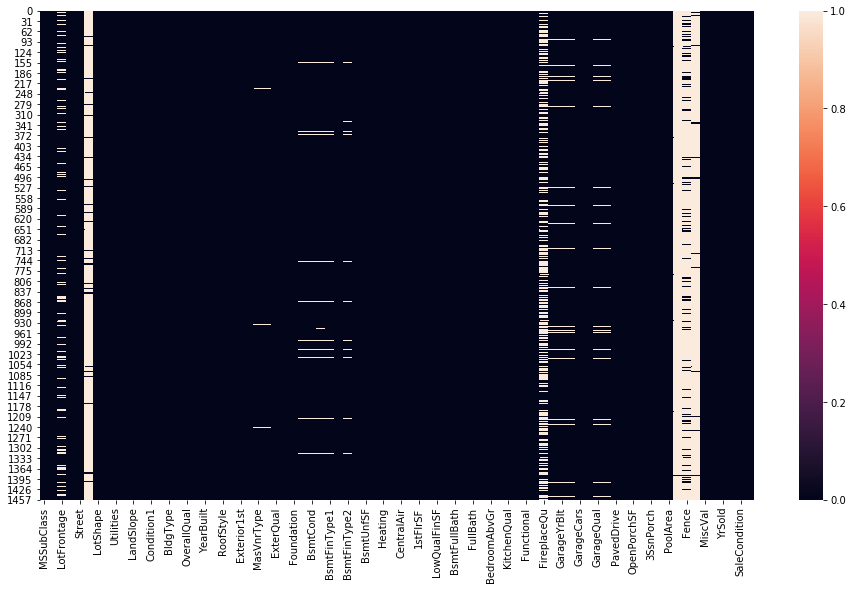

In [6]:
# Checking the null values by ploting heatmap
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())
plt.show()

In [7]:
# 1 -step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>0]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print("There is ", np.round(train[feature].isnull().sum()/train.shape[0]*100, 2),'% missing values in',feature)

There is  17.74 % missing values in LotFrontage
There is  93.77 % missing values in Alley
There is  0.55 % missing values in MasVnrType
There is  0.55 % missing values in MasVnrArea
There is  2.53 % missing values in BsmtQual
There is  2.53 % missing values in BsmtCond
There is  2.6 % missing values in BsmtExposure
There is  2.53 % missing values in BsmtFinType1
There is  2.6 % missing values in BsmtFinType2
There is  0.07 % missing values in Electrical
There is  47.26 % missing values in FireplaceQu
There is  5.55 % missing values in GarageType
There is  5.55 % missing values in GarageYrBlt
There is  5.55 % missing values in GarageFinish
There is  5.55 % missing values in GarageQual
There is  5.55 % missing values in GarageCond
There is  99.52 % missing values in PoolQC
There is  80.75 % missing values in Fence
There is  96.3 % missing values in MiscFeature


Observation: we found some columns have missing values we will handle them at the time of feature engineering.

# Data Types

In [8]:
# Checking different datatypes present in the dataset 
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

Dataset have 38 numerical columns and 43 categorical columns

# Numerical Features

In [9]:
numerical_features = train.select_dtypes(include=[np.number])
print('Number of numerical variables: ', len(numerical_features.columns))

numerical_features.head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# let's explore the content of numerical_features

for feature in numerical_features:
    print("{} have {} unique values\n {}\n".format(feature, len(train[feature].unique()), train[feature].unique()))

MSSubClass have 15 unique values
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

LotFrontage have 111 unique values
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

LotArea have 1073 unique values
 [ 8450  9600 11250 ... 17217 13175  9717]

OverallQual have 10 unique values
 [ 7  6  8  5  9  4 10  3  1  2]

OverallCond have 9 unique values
 [5 8 6 7 4 2 3 9 1]

YearBuilt have 112 unique values
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 200

GarageArea have 441 unique values
 [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  

numerical_features have 4 year variables, so we are going to plot them to get some insites.

In [11]:
# list of variables that contain year information

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
# let's explore the content of these year variables

for feature in year_feature:
    print(feature, train[feature].unique())
    print('\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

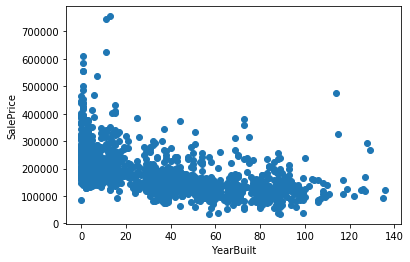

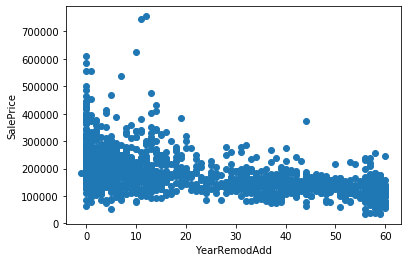

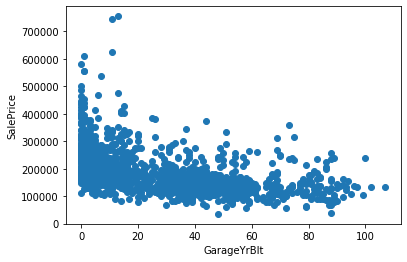

In [13]:
## Here we will compare year_feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Observation: The house which are currently build has the high sales price as compare to older houses 

.

Numerical variables are usually of 2 type
1. Discrete Variables 
2. Continous variables

# 1. Discrete Variables

In [14]:
discrete_feature=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                  'Fireplaces', 'GarageCars']

print("Discrete Variables Count: {}".format(len(discrete_feature)), '\n', discrete_feature)

Discrete Variables Count: 9 
 ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


In [15]:
train[discrete_feature].head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,1,0,2,1,3,1,8,0,2
1,0,1,2,0,3,1,6,1,2
2,1,0,2,1,3,1,6,1,2
3,1,0,1,0,3,1,7,1,3
4,1,0,2,1,4,1,9,1,3


In [16]:
# Unique values in each discreate feature

for feature in discrete_feature:
    print("{} have {} unique values \n {} \n".format(feature, len(train[feature].unique()), train[feature].unique()))

BsmtFullBath have 4 unique values 
 [1 0 2 3] 

BsmtHalfBath have 3 unique values 
 [0 1 2] 

FullBath have 4 unique values 
 [2 1 3 0] 

HalfBath have 3 unique values 
 [1 0 2] 

BedroomAbvGr have 8 unique values 
 [3 4 1 2 0 5 6 8] 

KitchenAbvGr have 4 unique values 
 [1 2 3 0] 

TotRmsAbvGrd have 12 unique values 
 [ 8  6  7  9  5 11  4 10 12  3  2 14] 

Fireplaces have 4 unique values 
 [0 1 2 3] 

GarageCars have 5 unique values 
 [2 3 1 0 4] 



0    58.630137
1    40.273973
2     1.027397
3     0.068493
Name: BsmtFullBath, dtype: float64


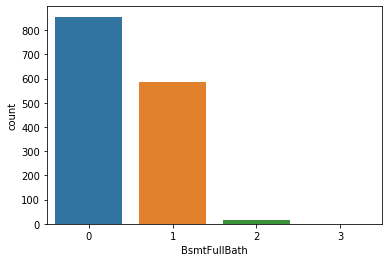

0    94.383562
1     5.479452
2     0.136986
Name: BsmtHalfBath, dtype: float64


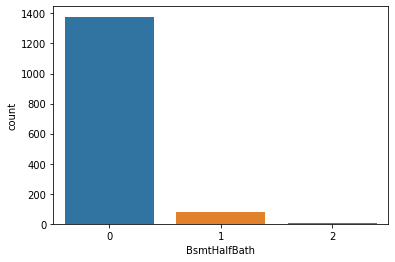

2    52.602740
1    44.520548
3     2.260274
0     0.616438
Name: FullBath, dtype: float64


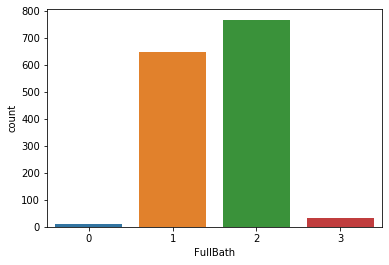

0    62.534247
1    36.643836
2     0.821918
Name: HalfBath, dtype: float64


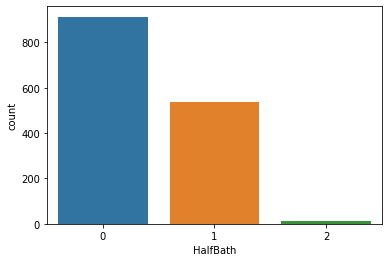

3    55.068493
2    24.520548
4    14.589041
1     3.424658
5     1.438356
6     0.479452
0     0.410959
8     0.068493
Name: BedroomAbvGr, dtype: float64


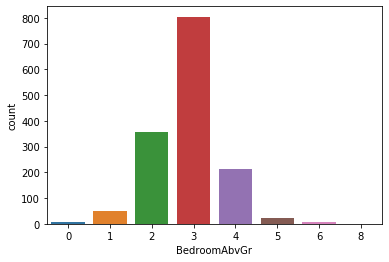

1    95.342466
2     4.452055
3     0.136986
0     0.068493
Name: KitchenAbvGr, dtype: float64


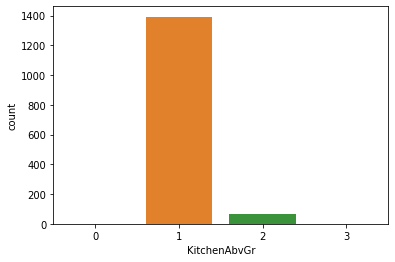

6     27.534247
7     22.534247
5     18.835616
8     12.808219
4      6.643836
9      5.136986
10     3.219178
11     1.232877
3      1.164384
12     0.753425
14     0.068493
2      0.068493
Name: TotRmsAbvGrd, dtype: float64


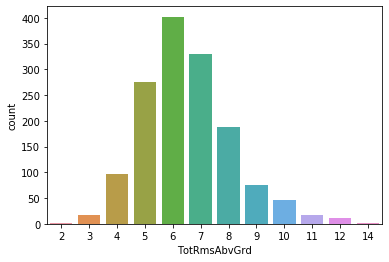

0    47.260274
1    44.520548
2     7.876712
3     0.342466
Name: Fireplaces, dtype: float64


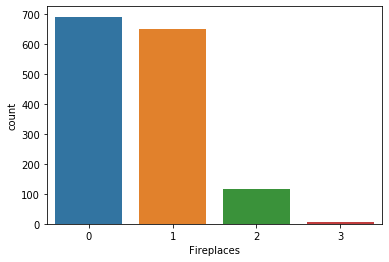

2    56.438356
1    25.273973
3    12.397260
0     5.547945
4     0.342466
Name: GarageCars, dtype: float64


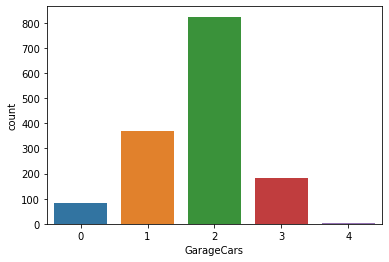

In [17]:
# univeriate analysis of discreate features

for feature in discrete_feature:
    data=train.copy()
    print(data[feature].value_counts()/data.shape[0]*100)
    sns.countplot(data[feature])
    plt.show()

Observations: 
1. Approx 59% houses doesn't have full bathroom  and very few houses have 2 or 3 full bathrooms in there basement.
2. Approx 94% houses doesn't have half bathroom in there basement.
3. Approx 97% of houses have full bathroom above ground, mostly houses have 2 full bathrooms above ground and very few have 3.
   There are some houses which doesn't have full bathroom.
4. Approx 63% houses doesn't have half bathrooms and very few have 2 half bathrooms in there houses above ground.
5. Approx 55% houses have 3 bedrooms above ground, mostly houses have 2 to 4 bedrooms and 
   very few houses have 5,6,8 or no bedroooms above ground.
6. Approx 95% houses have 1 kitchen above ground.
7. Most of the houses have 5 to 8 total rooms above ground.
8. Most of the houses doesn't or have only 1 fireplace and very few houses have 2 or 3 fireplace.
9. Approx 56% of houses have car parking space for 2 cars in there garage and there are very few houses that have 
   capacity to park 4 cars in there garage.

BsmtFullBath
0    154150
1    178800
2    188000
3    179000
Name: SalePrice, dtype: int64


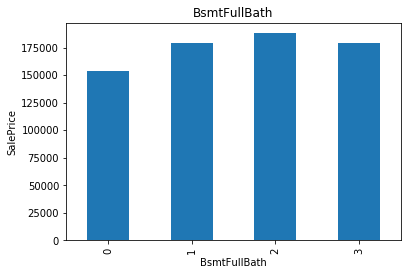

BsmtHalfBath
0    163250.0
1    159000.0
2    160850.5
Name: SalePrice, dtype: float64


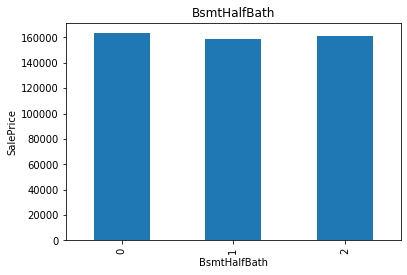

FullBath
0    145000
1    132375
2    196750
3    320000
Name: SalePrice, dtype: int64


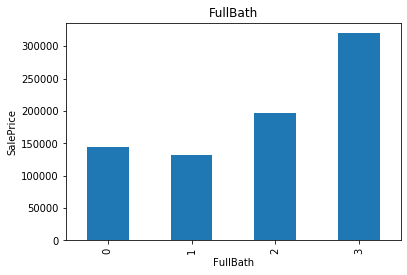

HalfBath
0    143000.0
1    189000.0
2    159243.5
Name: SalePrice, dtype: float64


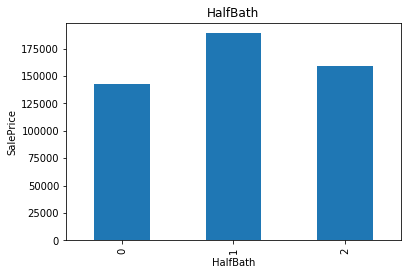

BedroomAbvGr
0    202500
1    145250
2    137250
3    169945
4    193500
5    161500
6    141000
8    200000
Name: SalePrice, dtype: int64


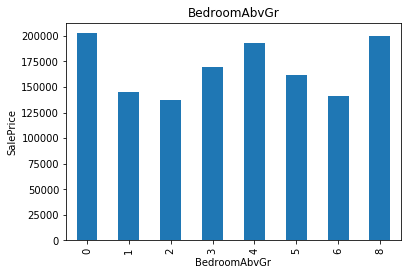

KitchenAbvGr
0    127500
1    165550
2    133900
3    109500
Name: SalePrice, dtype: int64


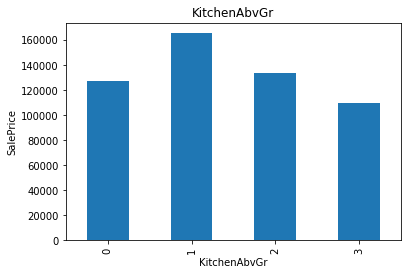

TotRmsAbvGrd
2      39300.0
3     100000.0
4     120500.0
5     130250.0
6     155000.0
7     184100.0
8     200000.0
9     252000.0
10    285000.0
11    311738.5
12    200000.0
14    200000.0
Name: SalePrice, dtype: float64


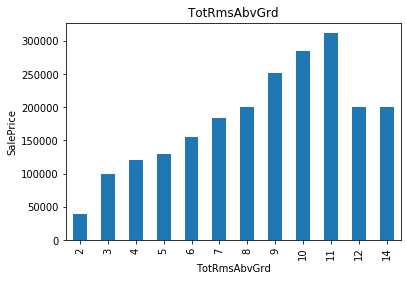

Fireplaces
0    135000
1    189975
2    206900
3    205000
Name: SalePrice, dtype: int64


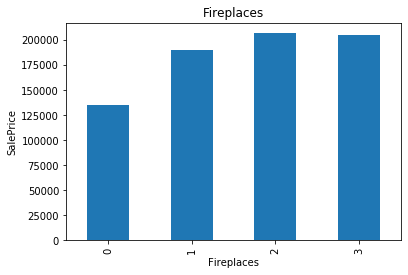

GarageCars
0    100000
1    128000
2    177750
3    295000
4    200000
Name: SalePrice, dtype: int64


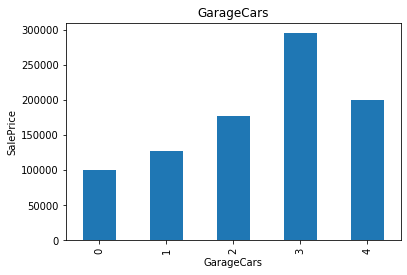

In [18]:
## Lets Find the realtionship between discrete feature and Sale Price

for feature in discrete_feature:
    data=train.copy()
    print(data.groupby(feature)['SalePrice'].median())
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observation:
1. Number of full bathrooms in basement of house doesn't effecting much the sales price of house.
2. Number of half bathrooms in basement of house doesn't effecting much the sales price of house.
3. If the house have 3 full bathrooms above ground then the sales price of the house is much greater as compare 
   to 1,2 or no bathrooms.
4. If the house have 1 half bathroom above ground then the sales price of house is more as compare to 2 or no half bathroom.
5. The sales price of house is more if he have 4,8 or no badroom above ground.
6. The sales price of house is more if he have 1 kitchen above ground as compare to other number of kitchens.
7. As the total number of rooms above ground increase the sales price also tends to increase 
   except in case if total rooms are above 12.
8. As the number of fireplaces in house increase the sales price also increases.
9. As the space for car parking in garage increase the sales price also increases

# 2. Continous variables

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + year_feature +
                    ['MSSubClass', 'OverallQual', 'OverallCond','MoSold']]

print("Continuous feature Count {}\n\n".format(len(continuous_feature)),continuous_feature)


Continuous feature Count 20

 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


Note: Didn't include feature like MSSubClass, OverallQual, OverallCond, MoSold in continous features as they are seems to be categorical

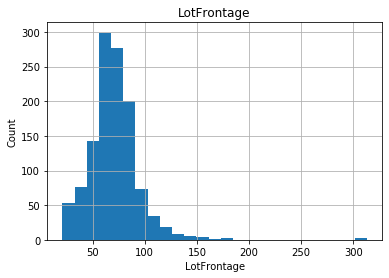

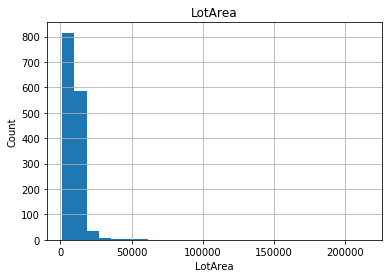

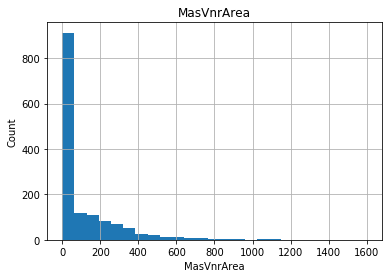

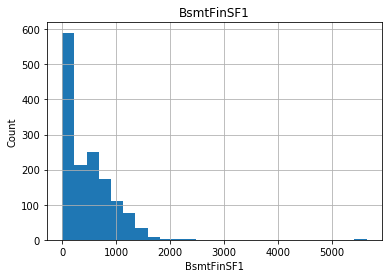

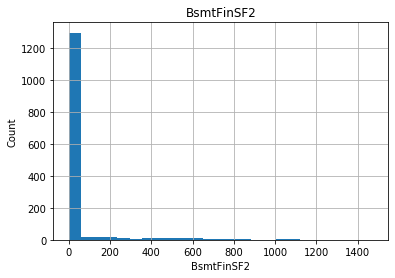

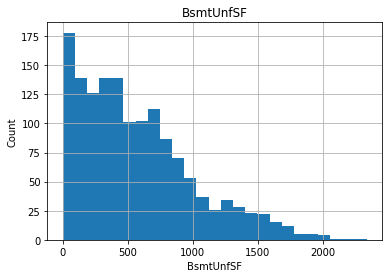

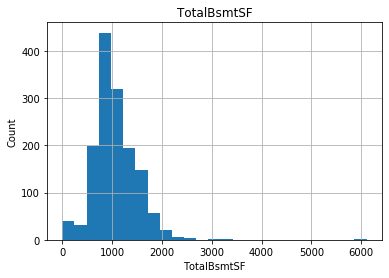

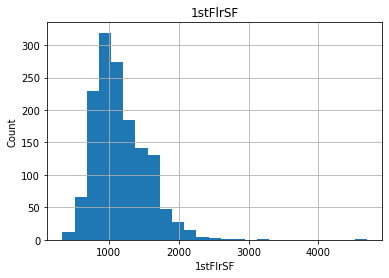

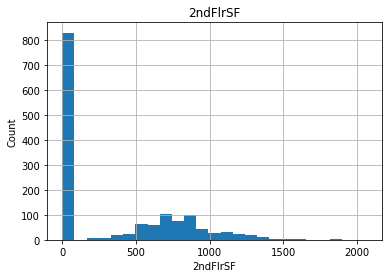

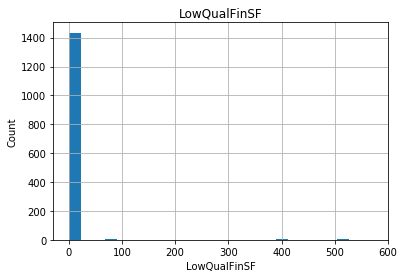

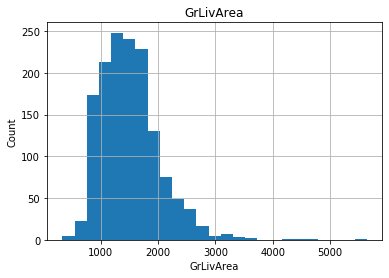

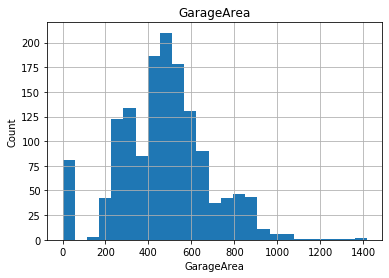

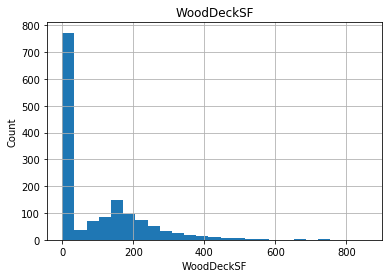

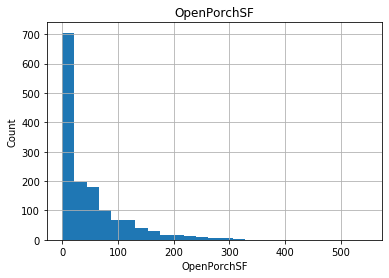

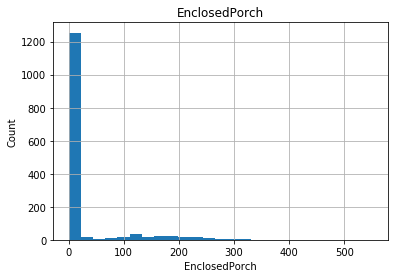

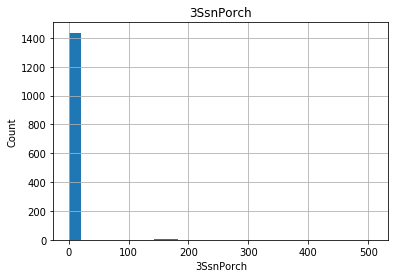

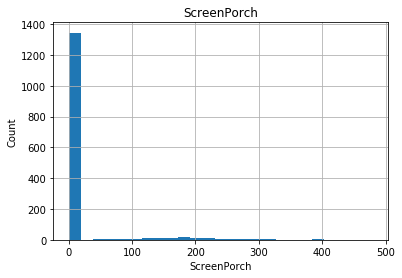

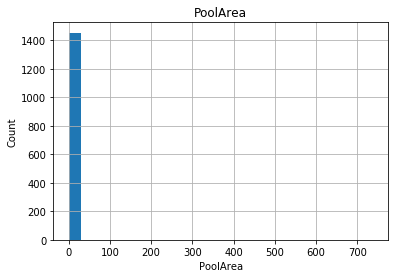

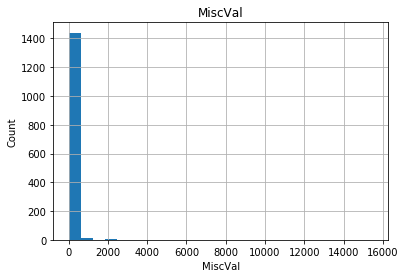

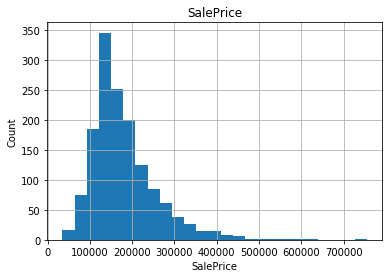

In [20]:
## Lets analyse the continuous_feature by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Observation: Lots of skewness is present in the continuous features we will handle this at the time of feature engineering.

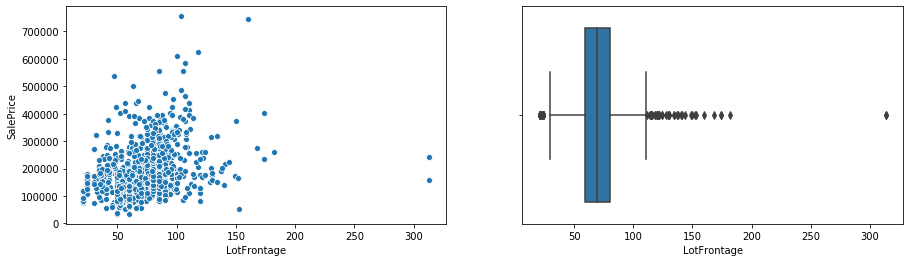

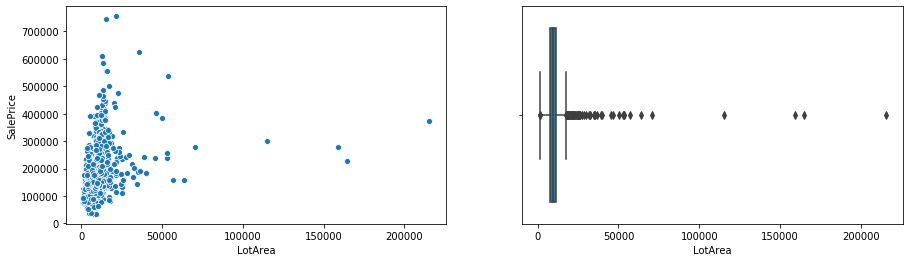

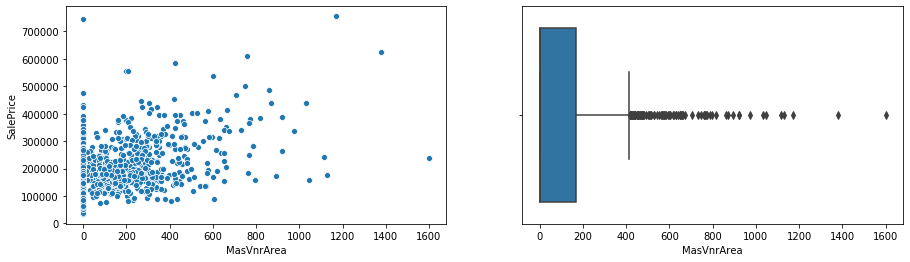

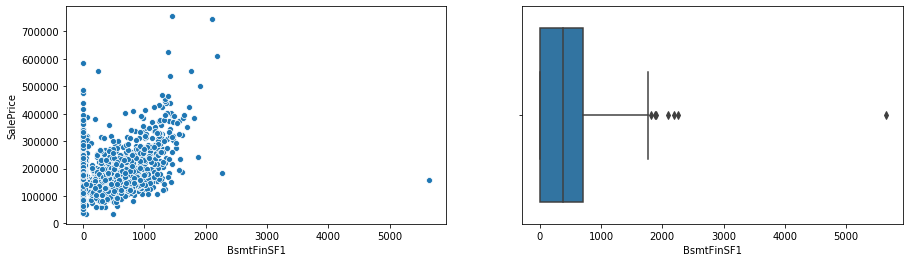

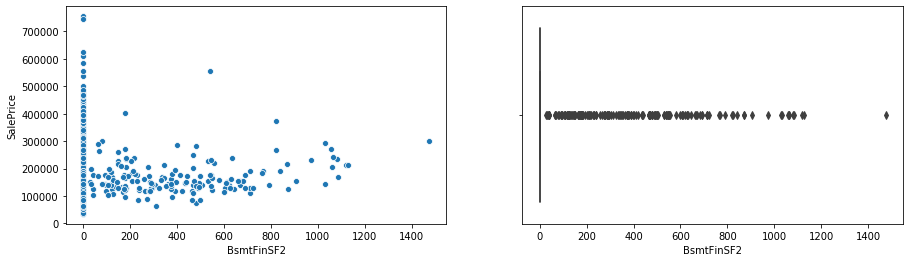

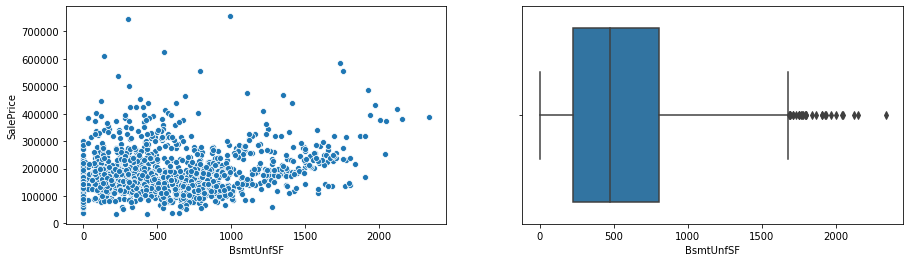

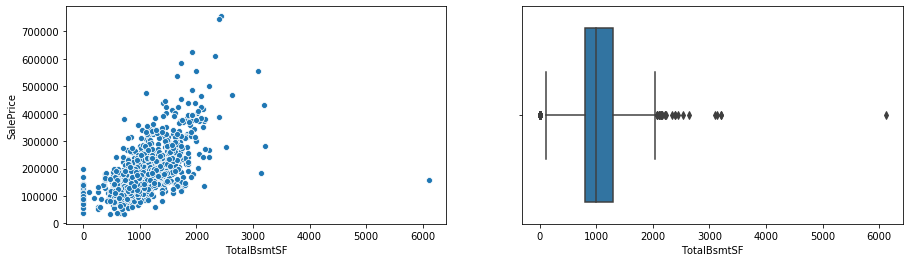

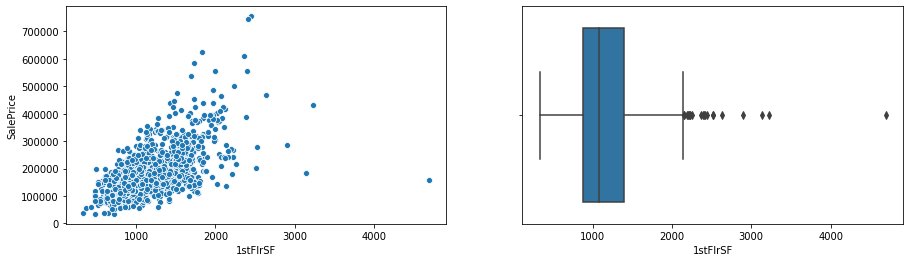

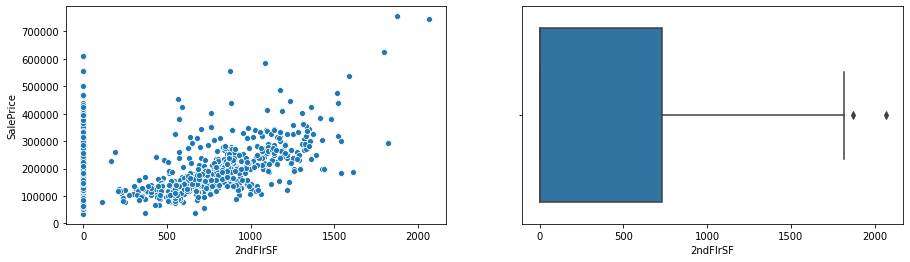

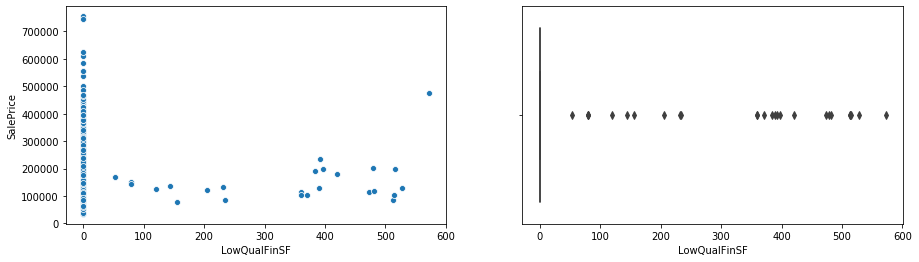

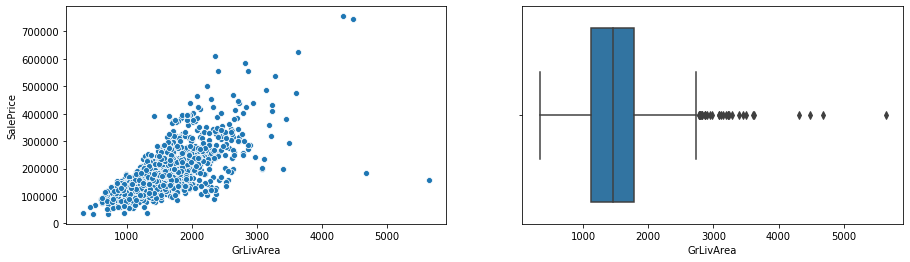

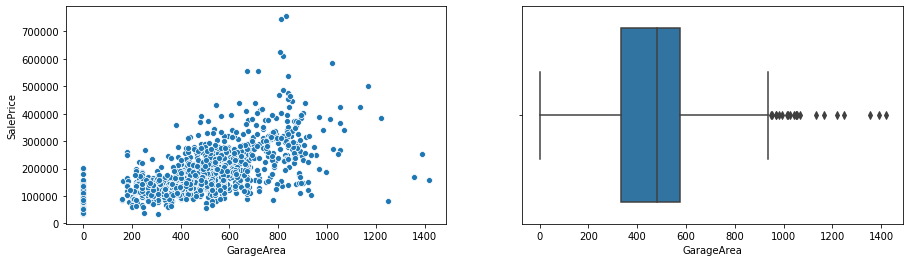

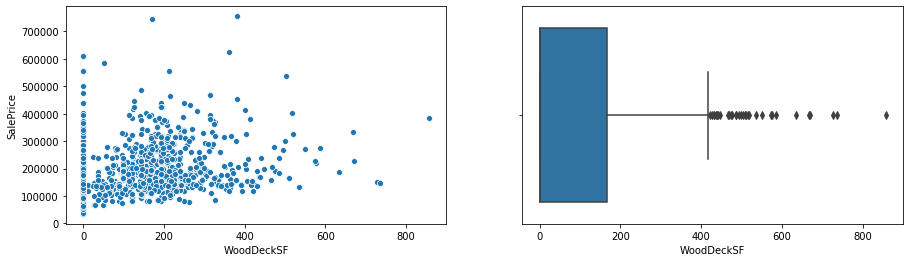

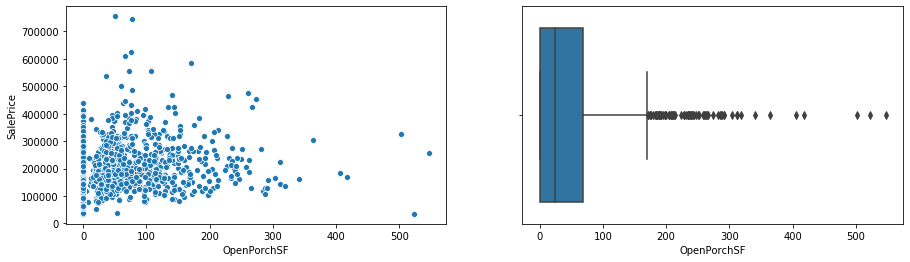

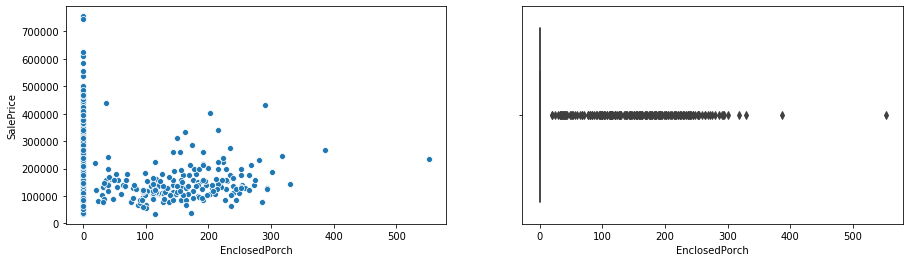

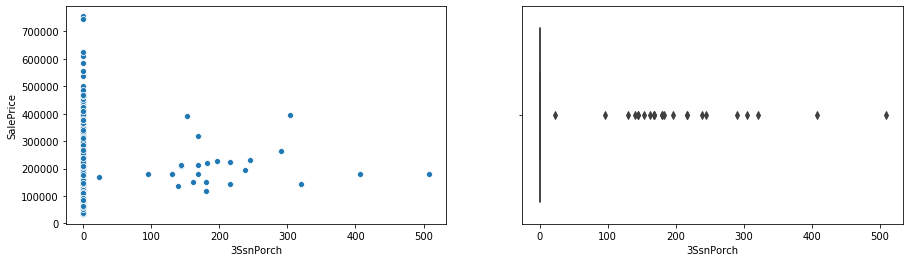

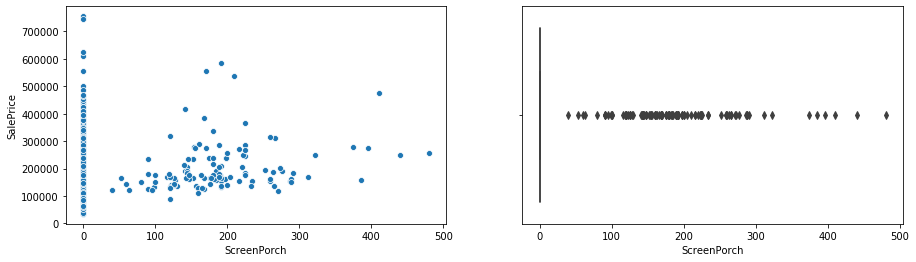

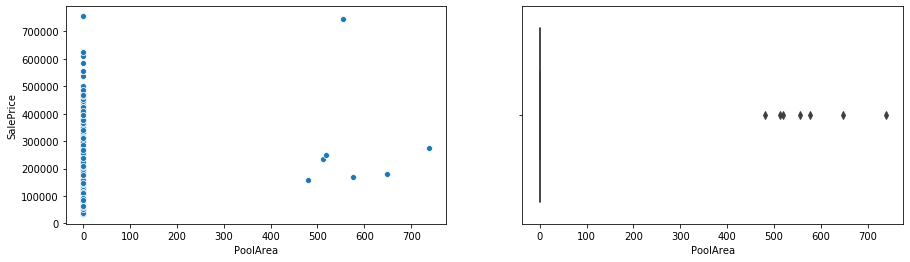

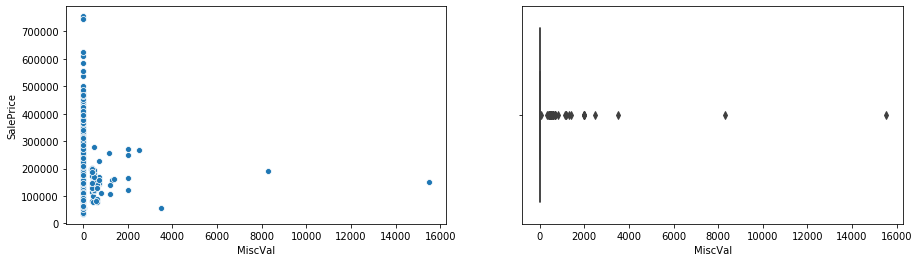

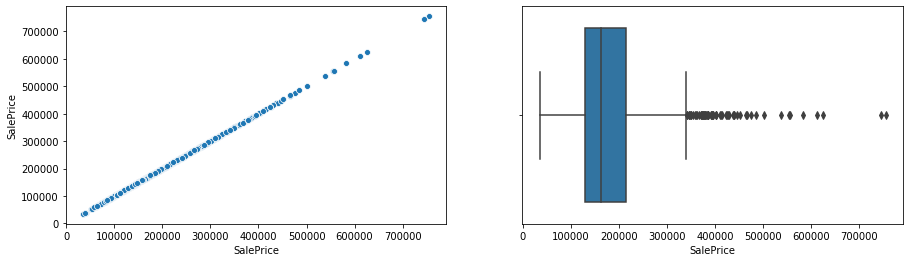

In [21]:
# Lets analyse the continuous_feature  with target by creating scatter plot to understand the distribution and 
# finding outliers if any with the help of boxplot


for feature in continuous_feature:
    data=train.copy()
    fig,axes=plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(data[feature],data['SalePrice'],ax=axes[0])
    sns.boxplot(data[feature],ax=axes[1])
    plt.show()



Observation: While analysing the continuous features with target by creating scatter plot and univeriate analysis by creating box plot we found there are outliers present in the dataset we will handle them at the time of feature engineering.

# Categorical Features

In [22]:
# List of categorical features
categorical_features=[feature for feature in train.columns if feature not in discrete_feature + year_feature 
                      + continuous_feature]

print("Categorical Variables Count: {} \n \n".format(len(categorical_features)),categorical_features)

Categorical Variables Count: 47 
 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


In [23]:
train[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,WD,Normal


Categorical variables are usually of 2 type
1. Ordinal Variables 
2. Nominal Variables

# 1. Ordinal Variables

In [24]:
Ordinal_features=['Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','FireplaceQu', 'Functional',
                  'KitchenQual','Electrical','HeatingQC','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond',
                  'BsmtQual','ExterCond','ExterQual','LandSlope','Utilities','LotShape', 'OverallQual', 'OverallCond']

In [25]:
# Number of unique features in each ordinal feature
for feature in Ordinal_features:
    print('{} have {} unique values \n {} \n'.format(feature,len(train[feature].unique()),train[feature].unique()))

Fence have 5 unique values 
 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 

PoolQC have 4 unique values 
 [nan 'Ex' 'Fa' 'Gd'] 

PavedDrive have 3 unique values 
 ['Y' 'N' 'P'] 

GarageCond have 6 unique values 
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 

GarageQual have 6 unique values 
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

GarageFinish have 4 unique values 
 ['RFn' 'Unf' 'Fin' nan] 

FireplaceQu have 6 unique values 
 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

Functional have 7 unique values 
 ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 

KitchenQual have 4 unique values 
 ['Gd' 'TA' 'Ex' 'Fa'] 

Electrical have 6 unique values 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] 

HeatingQC have 5 unique values 
 ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

BsmtFinType2 have 7 unique values 
 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

BsmtFinType1 have 7 unique values 
 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 

BsmtExposure have 5 unique values 
 ['No' 'Gd' 'Mn' 'Av' nan] 

BsmtCond have 5 unique values 
 ['TA' 'Gd' nan 'Fa' 'Po']

MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64


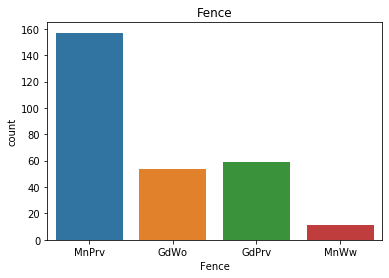

Gd    0.205479
Fa    0.136986
Ex    0.136986
Name: PoolQC, dtype: float64


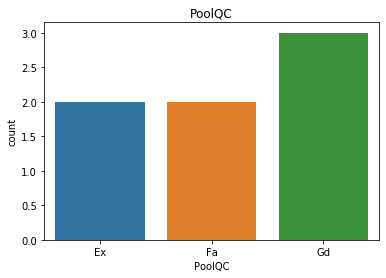

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64


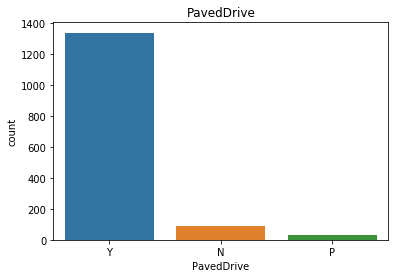

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64


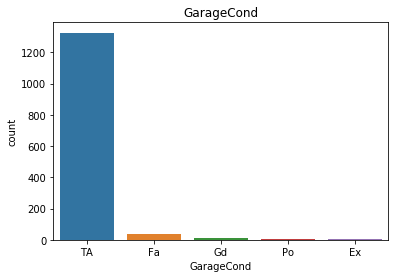

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64


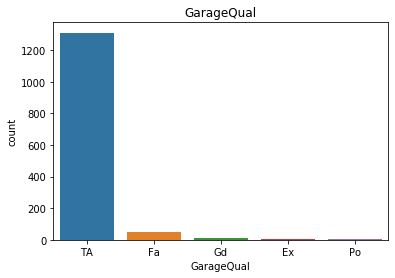

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64


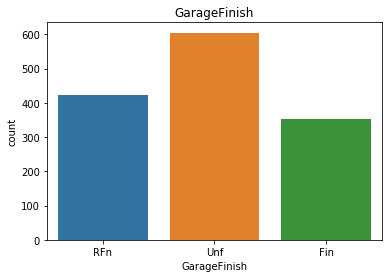

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64


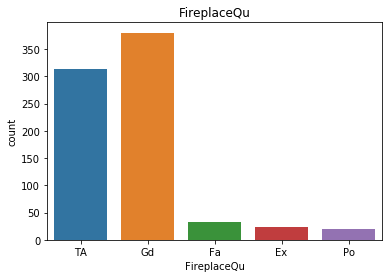

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64


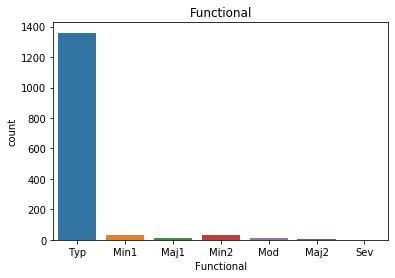

TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64


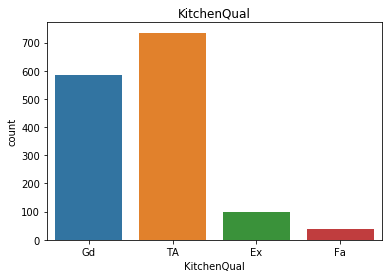

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64


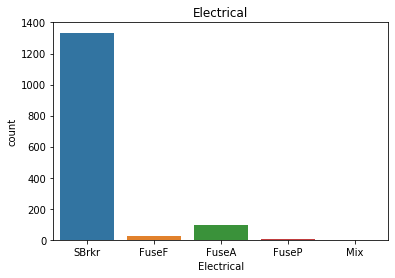

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64


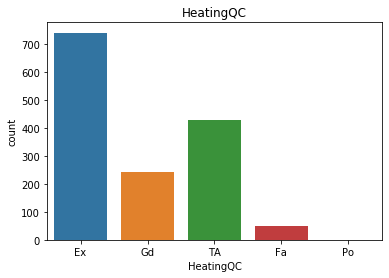

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64


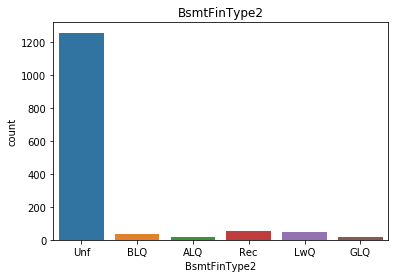

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64


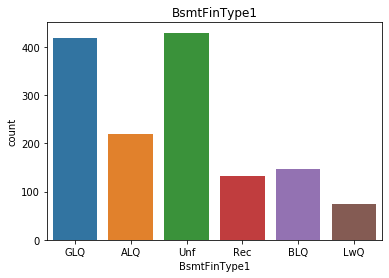

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64


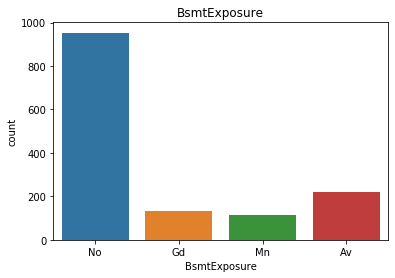

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64


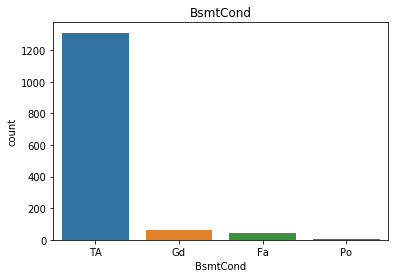

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64


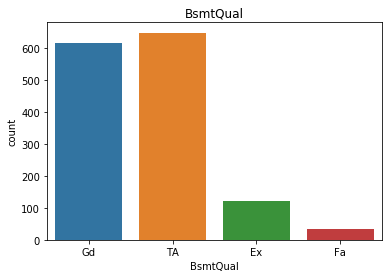

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64


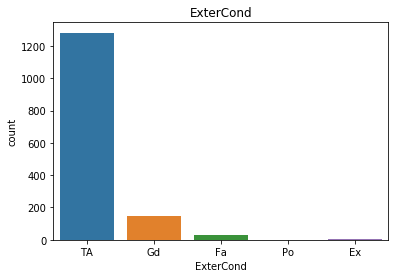

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64


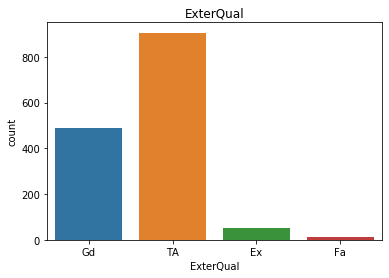

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64


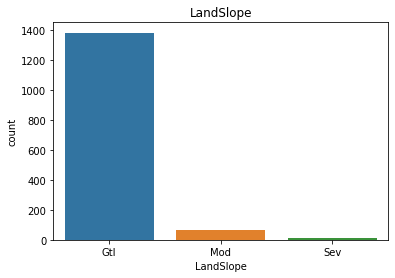

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64


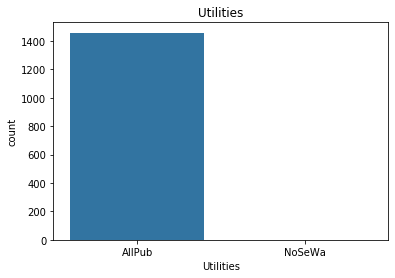

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64


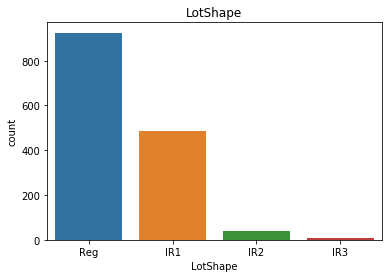

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64


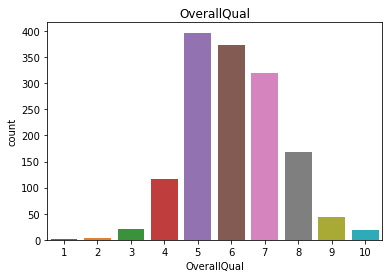

5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64


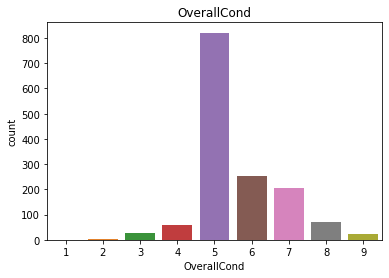

In [26]:
# Univeriate analysis of ordinal features

for feature in Ordinal_features:
    data=train.copy()
    print(data[feature].value_counts()/data.shape[0]*100)
    sns.countplot(data[feature])
    plt.title(feature)
    plt.show()

Observation: 
1. Approx 81% houses doesn't have fence.
2. 99.5 % houses doen't have pool and only 0.13% houses have excellent quality pool
3. Approx 92% houses have Paved road
4. Approx 91% houses have average garage condition and approx 5% houses have no garage
5. Approx 90% houses have average quality of garage
6. Garage construction of approx 41% houses has not finished yet, 29% garage is partly finished and garage construction of only 24% houses have finished and rest of the houses doen't have garage.
7. Approx 47% houses doen't have fireplace and the most of the houses which have fireplace are of good quality 
8. Most of the houses have average quality kitchen
9. 91% houses have standard circuit breakers & romex electrical systems
10. Most of the houses have excellent heating quality and condition.
11. Most of the houses basement work in not completed yet, whether they are single or multiple basement
12. The condition of most of the basements is average
13. Most of the base have an average height of 80 to 89 inches
14. Approx 88% houses have an average condition of exterior
15. Most of the houses have average quality of exterior
16. Approx 95% properties have gentle slope
17. Almost all houses have all public utilities avalable
18. Approx 63% houses have good lot sahpe
19. Most of the houses get an rating between 5 to 7 on overall material quality i.e average ,above average and good
20. Most of the houses have an average overall conditionis

Fence
GdPrv    167500
GdWo     138750
MnPrv    137450
MnWw     130000
Name: SalePrice, dtype: int64


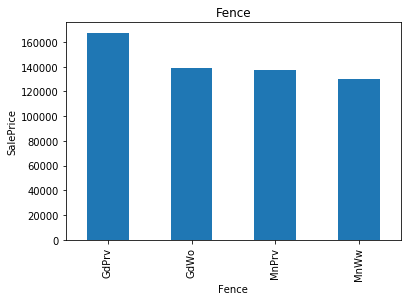

PoolQC
Ex    490000
Fa    215500
Gd    171000
Name: SalePrice, dtype: int64


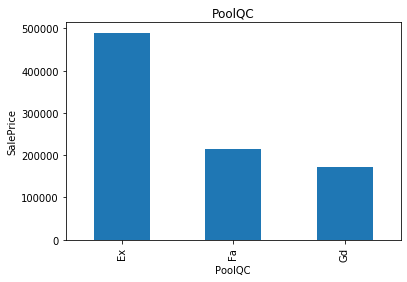

PavedDrive
N    111000
P    132250
Y    168500
Name: SalePrice, dtype: int64


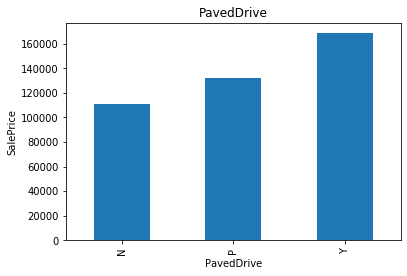

GarageCond
Ex    124000
Fa    114504
Gd    148000
Po    108000
TA    170000
Name: SalePrice, dtype: int64


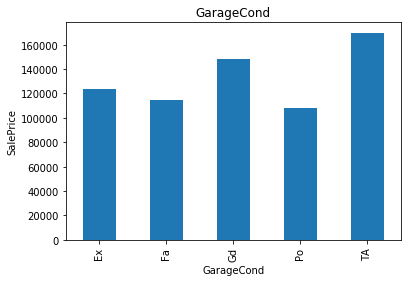

GarageQual
Ex    127500
Fa    115000
Gd    209115
Po     96500
TA    170000
Name: SalePrice, dtype: int64


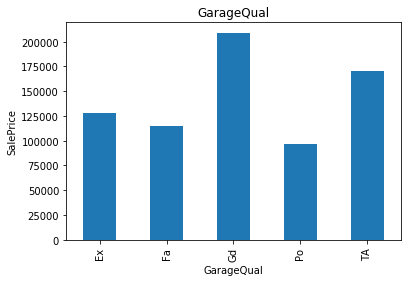

GarageFinish
Fin    215000
RFn    190000
Unf    135000
Name: SalePrice, dtype: int64


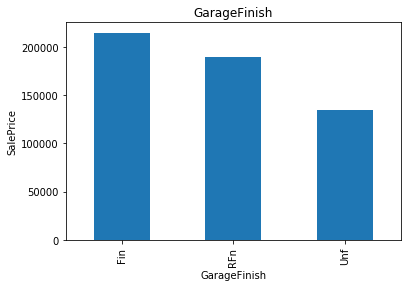

FireplaceQu
Ex    314250
Fa    158000
Gd    206950
Po    131500
TA    187500
Name: SalePrice, dtype: int64


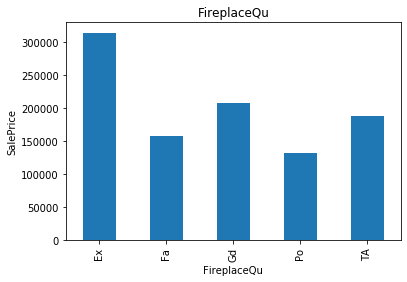

Functional
Maj1    140750
Maj2     85000
Min1    139000
Min2    140000
Mod     137900
Sev     129000
Typ     165500
Name: SalePrice, dtype: int64


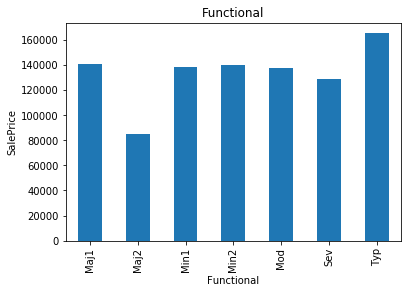

KitchenQual
Ex    316750
Fa    115000
Gd    201400
TA    137000
Name: SalePrice, dtype: int64


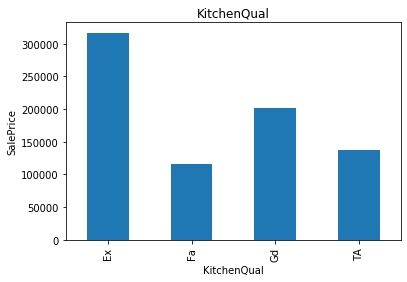

Electrical
FuseA    121250
FuseF    115000
FuseP     82000
Mix       67000
SBrkr    170000
Name: SalePrice, dtype: int64


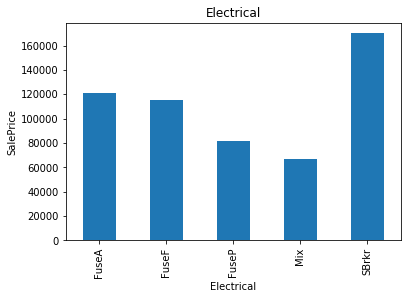

HeatingQC
Ex    194700
Fa    123500
Gd    152000
Po     87000
TA    135000
Name: SalePrice, dtype: int64


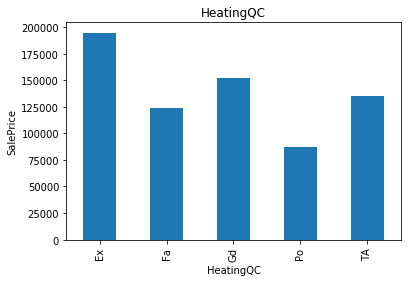

BsmtFinType2
ALQ    174900
BLQ    143000
GLQ    203125
LwQ    154000
Rec    148750
Unf    167000
Name: SalePrice, dtype: int64


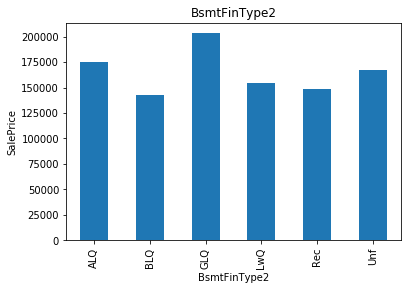

BsmtFinType1
ALQ    149250
BLQ    139100
GLQ    213750
LwQ    139000
Rec    142000
Unf    161750
Name: SalePrice, dtype: int64


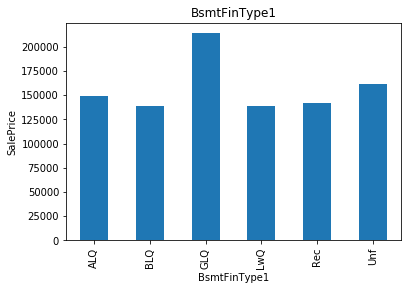

BsmtExposure
Av    185850
Gd    226975
Mn    182450
No    154000
Name: SalePrice, dtype: int64


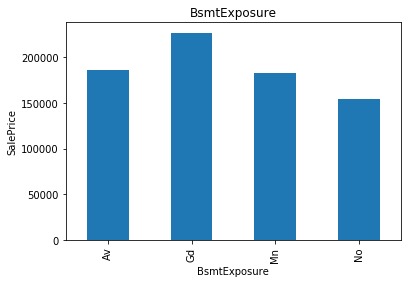

BsmtCond
Fa    118500
Gd    193879
Po     64000
TA    165000
Name: SalePrice, dtype: int64


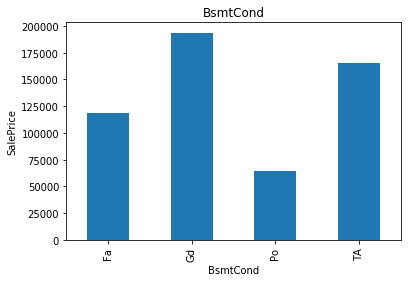

BsmtQual
Ex    318000
Fa    112000
Gd    192070
TA    135500
Name: SalePrice, dtype: int64


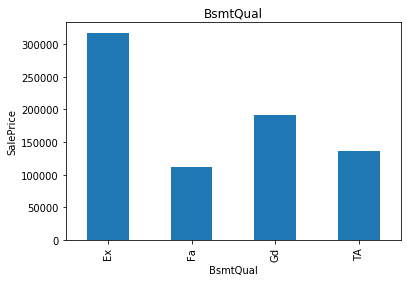

ExterCond
Ex    161000
Fa     95750
Gd    151250
Po     76500
TA    167370
Name: SalePrice, dtype: int64


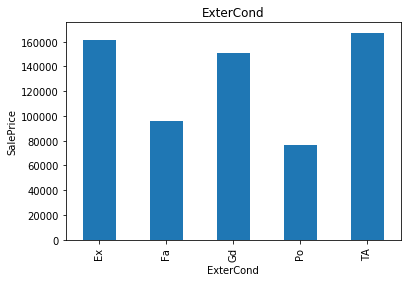

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64


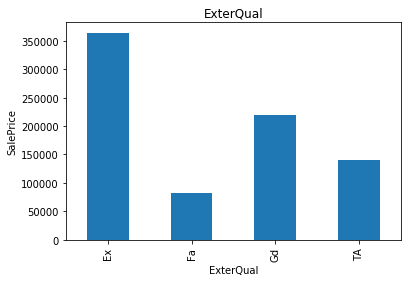

LandSlope
Gtl    161875
Mod    186700
Sev    185000
Name: SalePrice, dtype: int64


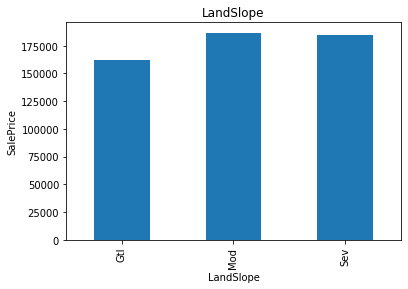

Utilities
AllPub    163000
NoSeWa    137500
Name: SalePrice, dtype: int64


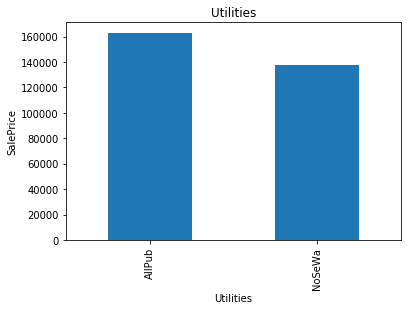

LotShape
IR1    189000
IR2    221000
IR3    203570
Reg    146000
Name: SalePrice, dtype: int64


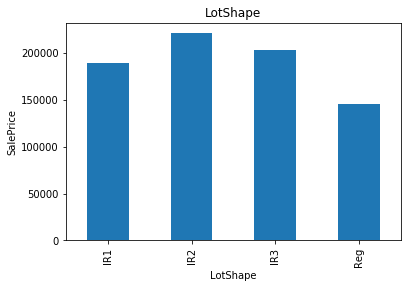

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64


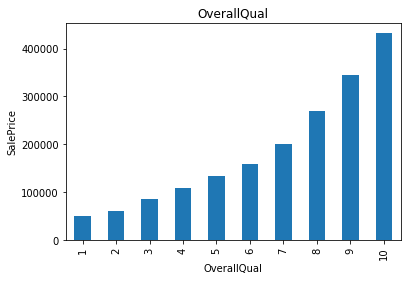

OverallCond
1     61000
2     85000
3     89500
4    115000
5    185000
6    142750
7    145000
8    142500
9    176200
Name: SalePrice, dtype: int64


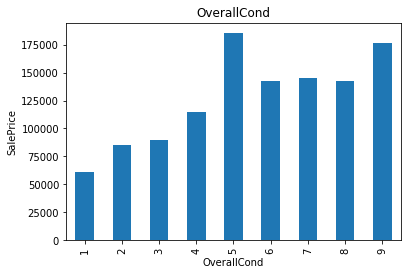

In [27]:
# Find out the relationship between ordinal features and SalesPrice

for feature in Ordinal_features:
    data=train.copy()
    print(data.groupby(feature)['SalePrice'].median())
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observation:
1. The price of house is high if they have minimum privacy fence quality
2. The price of house is high if they have excellent pool quality
3. The price of house is high if they have paved road access
4. The price of house is high if there garage is in average condition
5. The price of house is high if they have good quality of garage
6. The price of house is high if there garage interior is finished
7. The price of house is high if they have excellent quality of fireplace
8. The price of house is high if they have excellent quality of kitchen
9. The price of house is high if they use standard circuit breakers and romex in electrical system
10. The price of house is high if they have excellent heating quality and condition
11. The price of house is high if they have good living quarters in there basement
12. The price of house is high if there basement is in good condtion
13. The price of house is high if they have basement height more than 100 inches
14. The price of house is high if there exterior is in average, good or excellent condition
15. The price of house is high if the exterior used is of excellent quality
16. Land slope doesn't effect much the price of house
17. The price of house is high if they have provided all public utilities
18. The shape of lot doesn't effect much the price of house
19. The price of house is high if they have rated full
20. The price of house is high if there rating is above 5

# 2. Nominal Variables

In [28]:
nominal_features=[feature for feature in train.columns if feature not in discrete_feature + year_feature + continuous_feature
                  + Ordinal_features]

In [29]:
# Number of unique sub categories in each nominal feature

for feature in nominal_features:
    print('{} have {} unique values \n {} \n'.format(feature,len(train[feature].unique()),train[feature].unique()))

MSSubClass have 15 unique values 
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning have 5 unique values 
 ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street have 2 unique values 
 ['Pave' 'Grvl'] 

Alley have 3 unique values 
 [nan 'Grvl' 'Pave'] 

LandContour have 4 unique values 
 ['Lvl' 'Bnk' 'Low' 'HLS'] 

LotConfig have 5 unique values 
 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Neighborhood have 25 unique values 
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1 have 9 unique values 
 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2 have 8 unique values 
 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType have 5 unique values 
 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle have 8 unique values 

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64


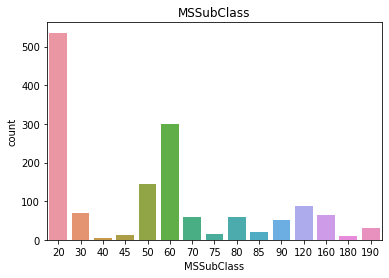

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64


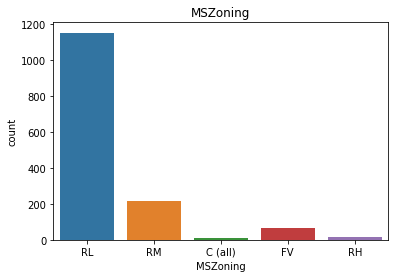

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64


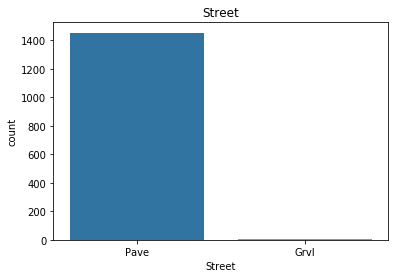

Grvl    3.424658
Pave    2.808219
Name: Alley, dtype: float64


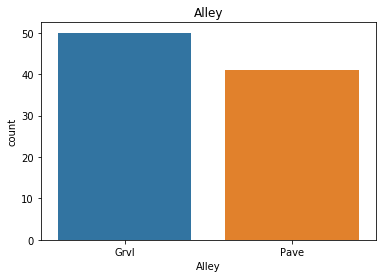

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64


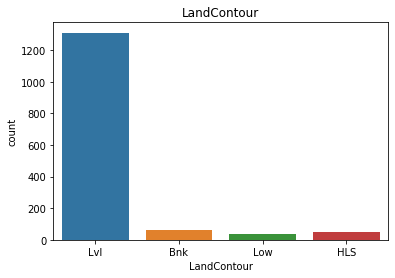

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64


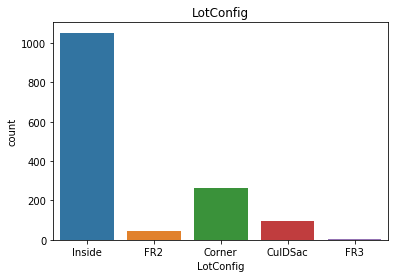

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
SWISU       1.712329
StoneBr     1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64


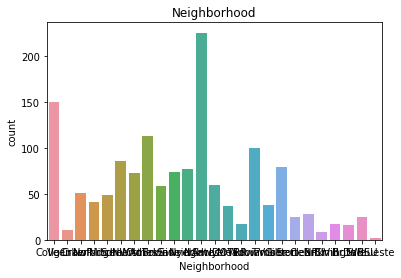

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64


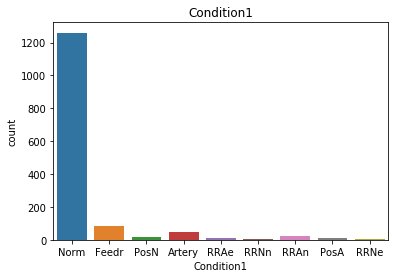

Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
RRAe       0.068493
RRAn       0.068493
PosA       0.068493
Name: Condition2, dtype: float64


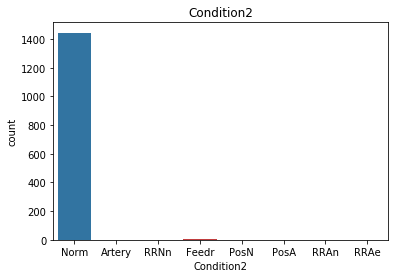

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64


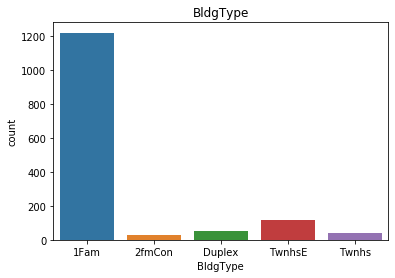

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64


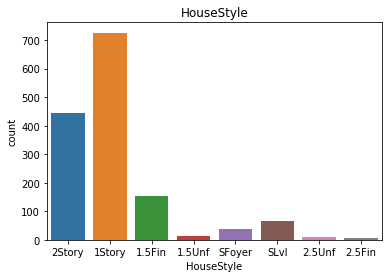

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64


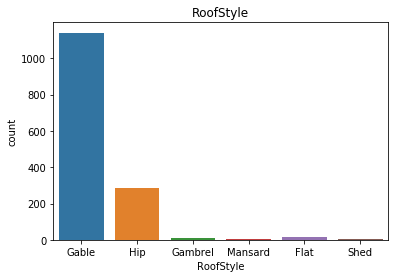

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Roll        0.068493
Membran     0.068493
Metal       0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64


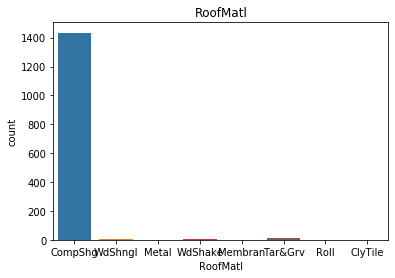

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
BrkComm     0.136986
Stone       0.136986
ImStucc     0.068493
AsphShn     0.068493
CBlock      0.068493
Name: Exterior1st, dtype: float64


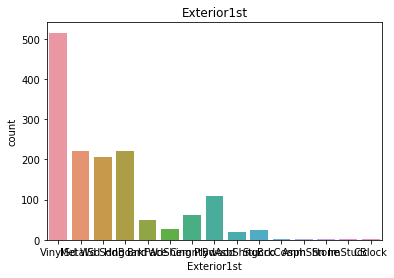

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: Exterior2nd, dtype: float64


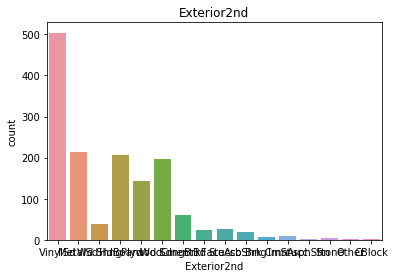

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64


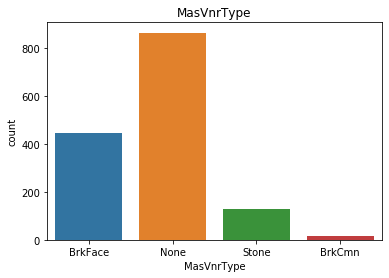

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64


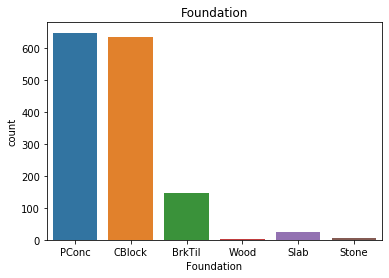

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64


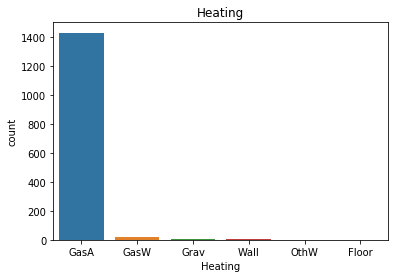

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64


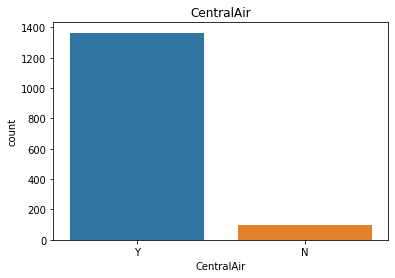

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64


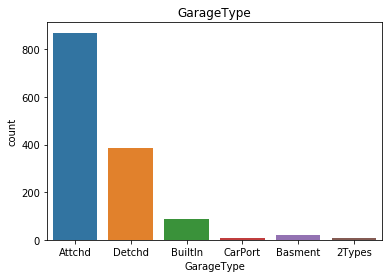

Shed    3.356164
Othr    0.136986
Gar2    0.136986
TenC    0.068493
Name: MiscFeature, dtype: float64


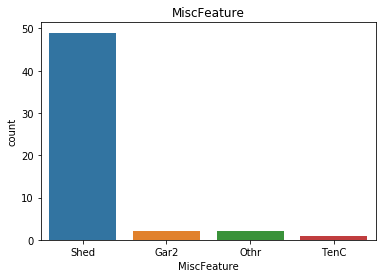

6     17.328767
7     16.027397
5     13.972603
4      9.657534
8      8.356164
3      7.260274
10     6.095890
11     5.410959
9      4.315068
12     4.041096
1      3.972603
2      3.561644
Name: MoSold, dtype: float64


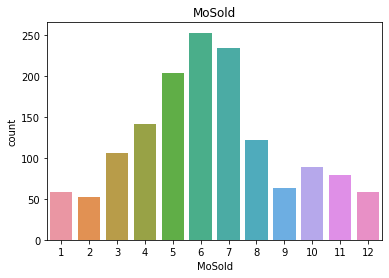

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLI     0.342466
ConLw     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64


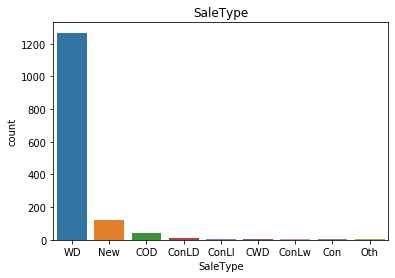

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64


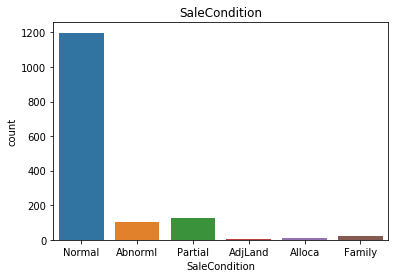

In [30]:
# Univeriate analysis of nominal features

for feature in nominal_features:
    data=train.copy()
    print(data[feature].value_counts()/data.shape[0]*100)
    sns.countplot(data[feature])
    plt.title(feature)
    plt.show()

Observation:
1. Most of the houses in the dataset have 1-story and 2-story dwelling type which was bulit after 1946
2. Approx 79% of houses are from residential low density zone
3. Almost all houses have paved road access to property
4. Approx 94% houses doesn't have alley access to property
5. Approx 90% property have flat level i.e no slope
6. Approx 72% lot are between inside lot i.e not at corner
7. Approx 84% houses have single-family detched dwelling
8. Approx 50% of houses have single story dwelling
9. Approx 78% houses have grable type of roof
10. Approx 98% houses have standard roof material
11. Most of the house have applied vinyl siding exterior covering
12 Approx 59% houses doesn't have any masonry veneer
13. Approx 88% houses have poured contrete or cinder block type foundation
14. Approx 98% houses have gas forced warm air furnace type of heating
15. Approx 93% houses have central air conditioning
16. Approx 60% houses have garage attached with them
17. Approx 96% houses are of same type .i.e don't have special or unique features
18. Most of the houses sold in the month of june and july
19. Approx 87% houses sold on bases of warranty deed- conventional
20. Approx 82% sales took place without any condition i.e normal sale condition

MSSubClass
20     159250
30      99900
40     142500
45     107500
50     132000
60     215200
70     156000
75     163500
80     166500
85     140750
90     135980
120    192000
160    146000
180     88500
190    128250
Name: SalePrice, dtype: int64


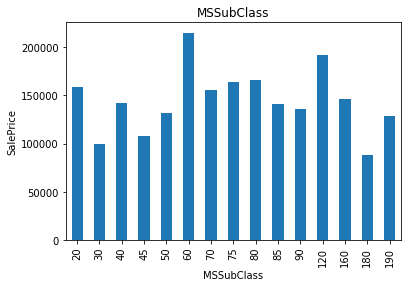

MSZoning
C (all)     74700
FV         205950
RH         136500
RL         174000
RM         120500
Name: SalePrice, dtype: int64


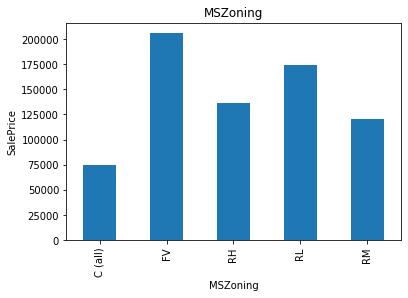

Street
Grvl    114250
Pave    163000
Name: SalePrice, dtype: int64


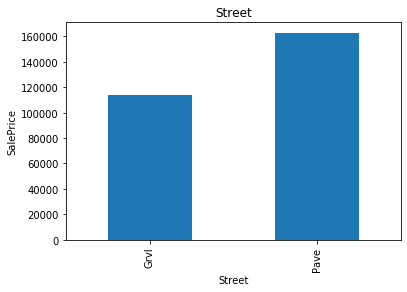

Alley
Grvl    119500
Pave    172500
Name: SalePrice, dtype: int64


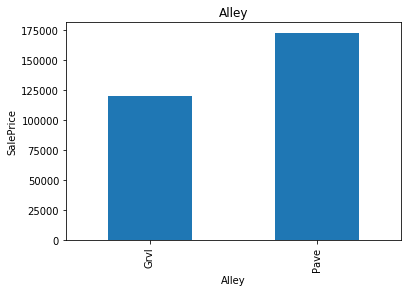

LandContour
Bnk    139400
HLS    222250
Low    190000
Lvl    162900
Name: SalePrice, dtype: int64


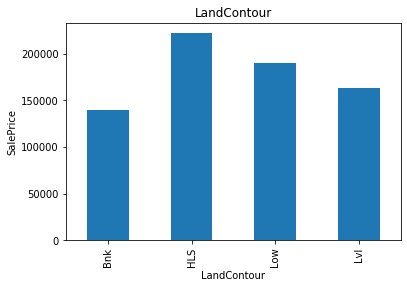

LotConfig
Corner     160000.0
CulDSac    199262.0
FR2        165000.0
FR3        195450.0
Inside     159697.5
Name: SalePrice, dtype: float64


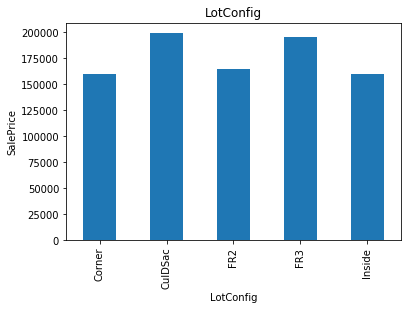

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64


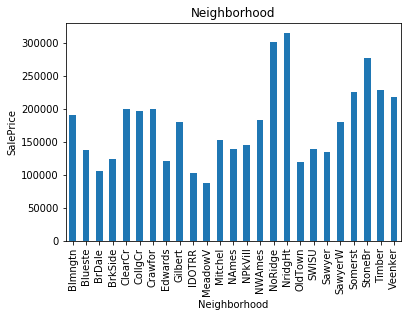

Condition1
Artery    119550
Feedr     140000
Norm      166500
PosA      212500
PosN      200000
RRAe      142500
RRAn      171495
RRNe      190750
RRNn      214000
Name: SalePrice, dtype: int64


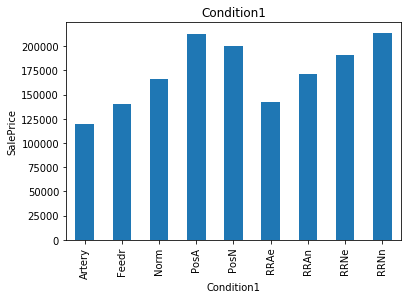

Condition2
Artery    106500
Feedr     127500
Norm      163500
PosA      325000
PosN      284875
RRAe      190000
RRAn      136905
RRNn       96750
Name: SalePrice, dtype: int64


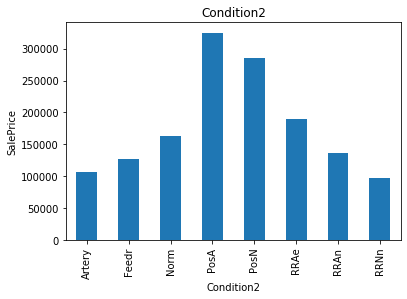

BldgType
1Fam      167900
2fmCon    127500
Duplex    135980
Twnhs     137500
TwnhsE    172200
Name: SalePrice, dtype: int64


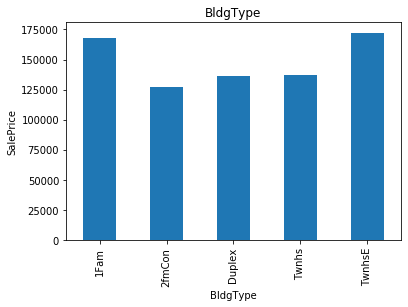

HouseStyle
1.5Fin    132000
1.5Unf    111250
1Story    154750
2.5Fin    194000
2.5Unf    133900
2Story    190000
SFoyer    135960
SLvl      164500
Name: SalePrice, dtype: int64


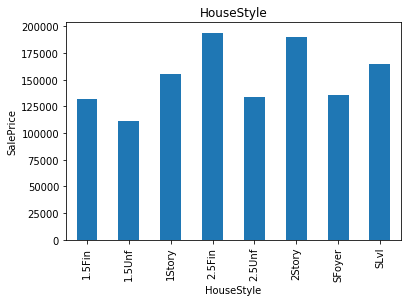

RoofStyle
Flat       185000
Gable      160000
Gambrel    139000
Hip        176500
Mansard    175000
Shed       225000
Name: SalePrice, dtype: int64


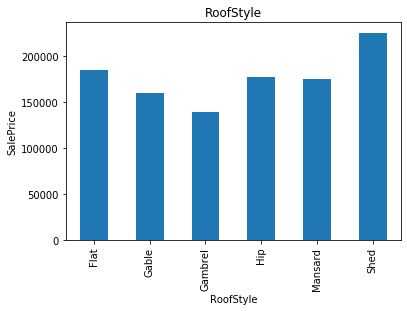

RoofMatl
ClyTile    160000
CompShg    162000
Membran    241500
Metal      180000
Roll       137000
Tar&Grv    167000
WdShake    242000
WdShngl    332500
Name: SalePrice, dtype: int64


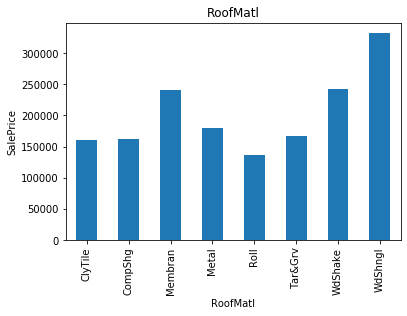

Exterior1st
AsbShng    108000.0
AsphShn    100000.0
BrkComm     71000.0
BrkFace    165750.0
CBlock     105000.0
CemntBd    236500.0
HdBoard    149900.0
ImStucc    262000.0
MetalSd    139000.0
Plywood    167450.0
Stone      258500.0
Stucco     144000.0
VinylSd    200000.0
Wd Sdng    138943.5
WdShing    128700.0
Name: SalePrice, dtype: float64


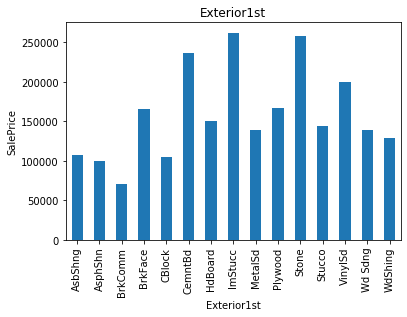

Exterior2nd
AsbShng    111000.0
AsphShn    139000.0
Brk Cmn    147000.0
BrkFace    160000.0
CBlock     105000.0
CmentBd    238750.0
HdBoard    155000.0
ImStucc    187600.0
MetalSd    138750.0
Other      319000.0
Plywood    160750.0
Stone      177000.0
Stucco     142000.0
VinylSd    200070.5
Wd Sdng    138000.0
Wd Shng    138225.0
Name: SalePrice, dtype: float64


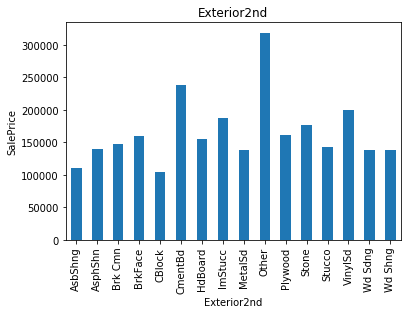

MasVnrType
BrkCmn     139000
BrkFace    181000
None       143000
Stone      246839
Name: SalePrice, dtype: int64


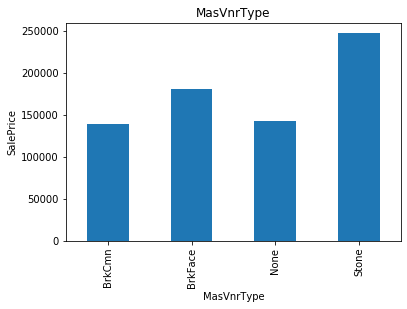

Foundation
BrkTil    125250
CBlock    141500
PConc     205000
Slab      104150
Stone     126500
Wood      164000
Name: SalePrice, dtype: int64


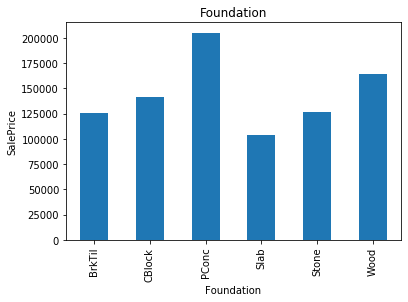

Heating
Floor     72500
GasA     164500
GasW     134950
Grav      79000
OthW     125750
Wall      91450
Name: SalePrice, dtype: int64


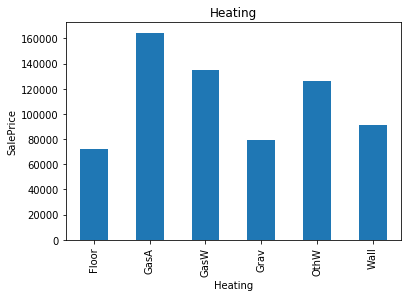

CentralAir
N     98000
Y    168000
Name: SalePrice, dtype: int64


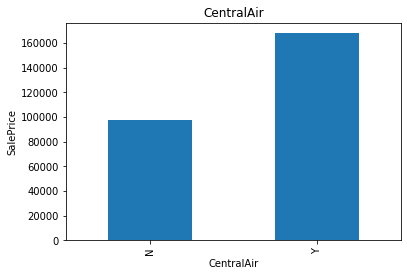

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64


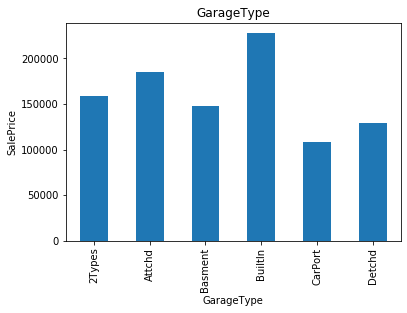

MiscFeature
Gar2    170750
Othr     94000
Shed    144000
TenC    250000
Name: SalePrice, dtype: int64


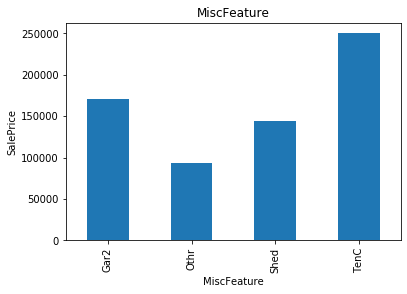

MoSold
1     151650
2     173250
3     165250
4     147000
5     154000
6     163000
7     165195
8     174450
9     185900
10    159000
11    173000
12    178000
Name: SalePrice, dtype: int64


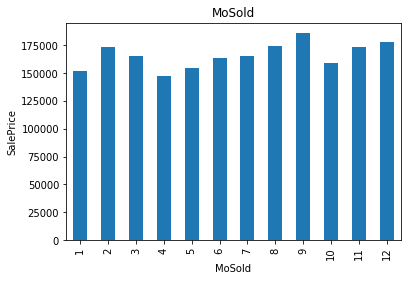

SaleType
COD      139000
CWD      188750
Con      269600
ConLD    140000
ConLI    125000
ConLw    144000
New      247453
Oth      116050
WD       158000
Name: SalePrice, dtype: int64


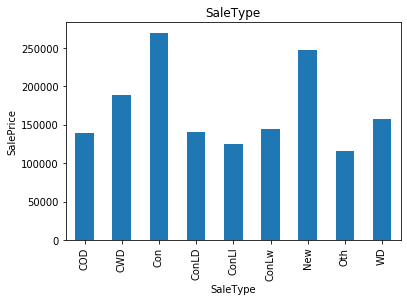

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64


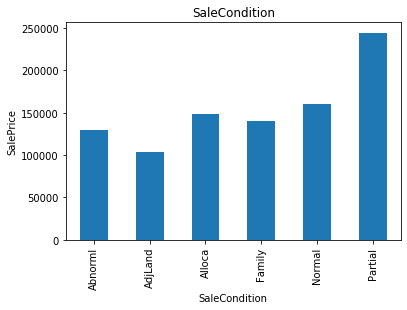

In [31]:
# Find out the relationship between nominal features and SalesPrice

for feature in nominal_features:
    data=train.copy()
    print(data.groupby(feature)['SalePrice'].median())
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observation:
1. The price of house is high if they are located at floating village residential zone
2. The price of house is high if they have paved road and alley access to property
3. The price of house is high if they are located at hillside
4. The price of lot is high if they are located at cul-de-sac or have frontage on 3 sides of properity
5. The price of house is high if they have shed type of roof
6. The price of house is high if they have wood shingles at there roof material
7. The price of house is high if they have stone masonry veneer type
8. The price of house is high if they have poured contrete type of foundation
9. The price of house is high if they have gas forced warm air furnace type of heating
10. The price of house is high if they have central air conditioning
11. The price of house is high if they have built in garage i.e garage is part of house-typically has room above garage
12. The price of house is high if they have tennis court
13. The price of house is high if they have wood shingles at there roof material
14. The price of house is high if they was not completed.